## Лабораторна №4

### 1. Загальні операції з TensorFlow:

In [1]:
import tensorflow as tf

# a. Створення тензорів:
print("a. Створення тензорів:")

# Скаляр
scalar = tf.constant(7)
print("\nСкаляр:")
print(scalar)

# Вектор
vector = tf.constant([1, 2, 3, 4, 5])
print("\nВектор:")
print(vector)

# Матриця
matrix = tf.constant([[1, 2], [3, 4]])
print("\nМатриця:")
print(matrix)

# Випадковий тензор
random_tensor = tf.random.uniform(shape=(2, 3), minval=0, maxval=10)
print("\nВипадковий тензор:")
print(random_tensor)

# b. Операції з тензорами:
print("\nb. Операції з тензорами:")

# Додавання
add_result = tf.add(vector, 5)
print("\nРезультат додавання:")
print(add_result)

# Множення
mul_result = tf.multiply(matrix, 2)
print("\nРезультат множення:")
print(mul_result)

# Синус
sin_result = tf.sin(tf.constant([0.0, 0.5 * 3.1416, 3.1416]))
print("\nСинус:")
print(sin_result)

# c. Індексація та зрізи:
print("\nc. Індексація та зрізи:")

# Індексація
indexed_element = matrix[1, 1]
print("\nЕлемент за індексом [1, 1]:")
print(indexed_element)

# Зріз
sliced_vector = vector[:3]
print("\nЗріз вектора:")
print(sliced_vector)

# d. Зміна форми тензорів:
print("\nd. Зміна форми тензорів:")

# Зміна форми
reshaped_matrix = tf.reshape(matrix, (1, 4))
print("\nРешейпнута матриця:")
print(reshaped_matrix)


a. Створення тензорів:

Скаляр:
tf.Tensor(7, shape=(), dtype=int32)

Вектор:
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)

Матриця:
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)

Випадковий тензор:
tf.Tensor(
[[3.8919437  0.08575201 5.13595   ]
 [2.273575   0.7125497  4.1243734 ]], shape=(2, 3), dtype=float32)

b. Операції з тензорами:

Результат додавання:
tf.Tensor([ 6  7  8  9 10], shape=(5,), dtype=int32)

Результат множення:
tf.Tensor(
[[2 4]
 [6 8]], shape=(2, 2), dtype=int32)

Синус:
tf.Tensor([ 0.0000000e+00  1.0000000e+00 -7.2399803e-06], shape=(3,), dtype=float32)

c. Індексація та зрізи:

Елемент за індексом [1, 1]:
tf.Tensor(4, shape=(), dtype=int32)

Зріз вектора:
tf.Tensor([1 2 3], shape=(3,), dtype=int32)

d. Зміна форми тензорів:

Решейпнута матриця:
tf.Tensor([[1 2 3 4]], shape=(1, 4), dtype=int32)


### 2. Глибше ознайомлення з TensorFlow:

#### Регресія:

7/7 [==============================] - 0s 1ms/step
Mean Squared Error: 20.230641397627224


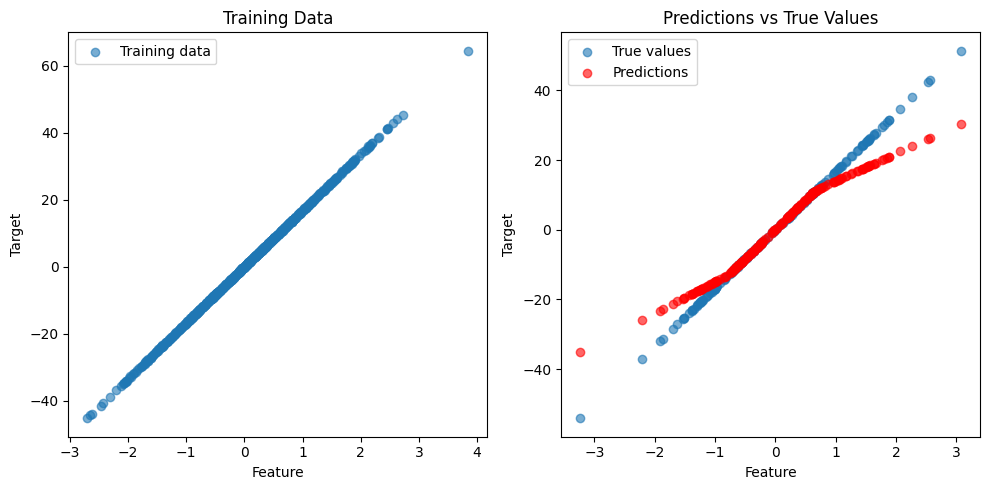

In [26]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Згенерувати синтетичний набір даних
X, y = make_regression(n_samples=1000, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створити модель
model_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Вибрати функцію втрати та оптимізатор
model_regression.compile(optimizer='adam', loss='mse')

# Навчити модель
model_regression.fit(X_train, y_train, epochs=50, verbose=0)

# Оцінити регресійну точність
predictions = model_regression.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Візуалізація даних
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, label='Training data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training Data')
plt.legend()

# Візуалізація результатів
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.6, label='True values')
plt.scatter(X_test, predictions, color='red', alpha=0.6, label='Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Predictions vs True Values')
plt.legend()
plt.tight_layout()
plt.show()





#### Класифікація:

7/7 [==============================] - 0s 1ms/step
Accuracy: 99.00%


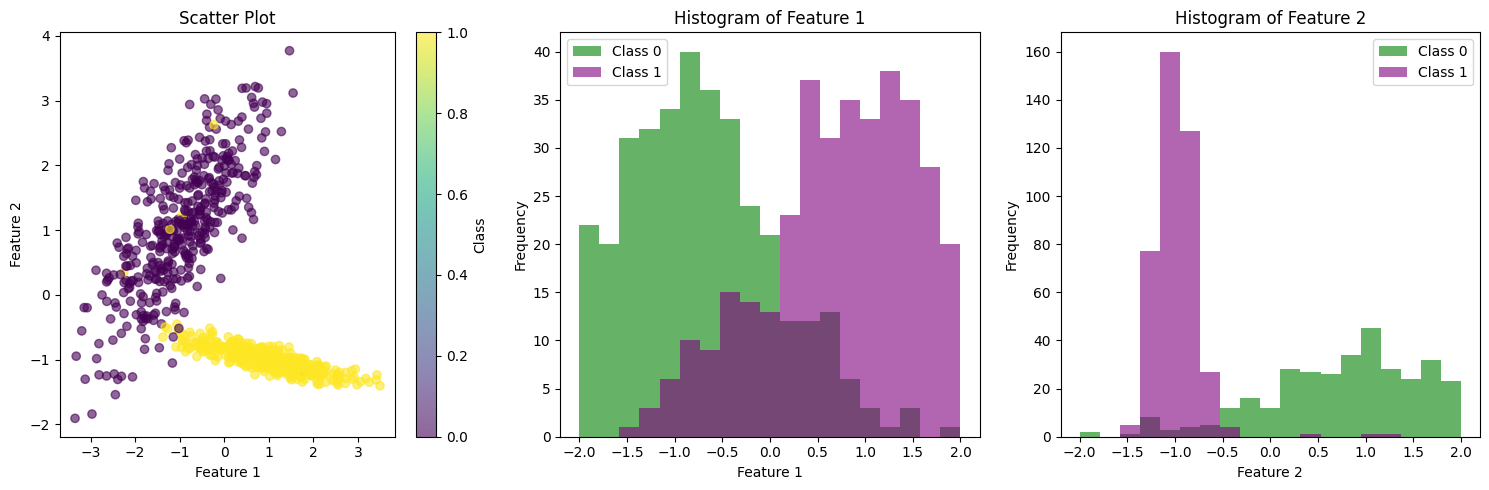

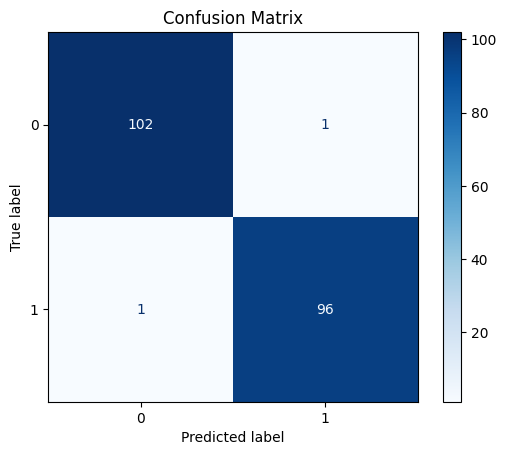

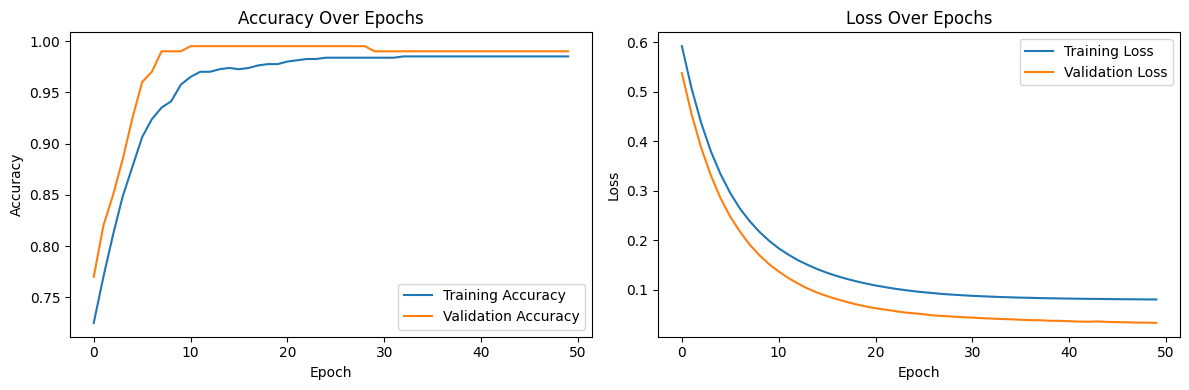

In [30]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Згенерувати синтетичний набір даних
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=41)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створити модель
model_classification = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Вибрати функцію втрати, оптимізатор та метрики
model_classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчити модель
history = model_classification.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))

# Оцінити класифікаційну точність
y_pred = (model_classification.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Візуалізація даних
plt.figure(figsize=(15, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot')
plt.colorbar(label='Class')

# Гістограми
plt.subplot(1, 3, 2)
plt.hist(X_train[y_train == 0][:, 0], alpha=0.6, color='green', bins=np.linspace(-2, 2, 20), label='Class 0')
plt.hist(X_train[y_train == 1][:, 0], alpha=0.6, color='purple', bins=np.linspace(-2, 2, 20), label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title('Histogram of Feature 1')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(X_train[y_train == 0][:, 1], alpha=0.6, color='green', bins=np.linspace(-2, 2, 20), label='Class 0')
plt.hist(X_train[y_train == 1][:, 1], alpha=0.6, color='purple', bins=np.linspace(-2, 2, 20), label='Class 1')
plt.xlabel('Feature 2')
plt.ylabel('Frequency')
plt.title('Histogram of Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


# Візуалізація результатів
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Візуалізація процесу навчання
plt.figure(figsize=(12, 4))

# Графік зміни точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Графік зміни функції втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()